In [ ]:
import pandas as pd
import random

In [ ]:
issues = [
    "Login issue",
    "Payment failed",
    "Account blocked",
    "Refund delayed",
    "Card not working",
    "Transaction not reflected"
]


In [ ]:
channels = ["Chat", "Email", "Call"]
priorities = ["Low", "Medium", "High"]

In [ ]:
data = []


In [ ]:
for i in range(300):
    data.append({
        "Ticket_ID": i+1,
        "Issue_Text": random.choice(issues),
        "Channel": random.choice(channels),
        "Priority": random.choice(priorities),
        "Resolution_Time": random.randint(1,5)
    })


In [ ]:
df = pd.DataFrame(data)
df.head()

,Ticket_ID,Issue_Text,Channel,Priority,Resolution_Time
0,1,Login issue,Chat,Medium,4
1,2,Login issue,Email,High,4
2,3,Transaction not reflected,Call,Medium,4
3,4,Refund delayed,Chat,Low,5
4,5,Transaction not reflected,Call,Medium,2


In [ ]:


print(df.head())
print(df.info())


   Ticket_ID                 Issue_Text Channel Priority  Resolution_Time
0          1                Login issue    Chat   Medium                4
1          2                Login issue   Email     High                4
2          3  Transaction not reflected    Call   Medium                4
3          4             Refund delayed    Chat      Low                5
4          5  Transaction not reflected    Call   Medium                2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Ticket_ID        300 non-null    int64 
 1   Issue_Text       300 non-null    object
 2   Channel          300 non-null    object
 3   Priority         300 non-null    object
 4   Resolution_Time  300 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 11.8+ KB
None


In [ ]:
print(df['Issue_Text'].value_counts().head(10))

Issue_Text
Login issue                  57
Transaction not reflected    53
Payment failed               53
Refund delayed               49
Account blocked              46
Card not working             42
Name: count, dtype: int64


In [ ]:
print(df['Priority'].value_counts())

Priority
Low       108
High       99
Medium     93
Name: count, dtype: int64


In [ ]:
import re


In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z ]', '', text)
    return text

In [ ]:
df['clean_text'] = df['Issue_Text'].apply(clean_text)

In [ ]:
#sentiment analysis

In [ ]:
pip install textblob


In [ ]:
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment'] = df['clean_text'].apply(get_sentiment)


In [ ]:
#identifying high-risk issues

In [ ]:
def risk_level(row):
    if row['Priority'] == 'High' and row['sentiment'] < 0:
        return "High Risk"
    elif row['Priority'] == 'Medium':
        return "Medium Risk"
    else:
        return "Low Risk"

df['Risk_Level'] = df.apply(risk_level, axis=1)


In [ ]:
print(df['Risk_Level'].value_counts())


Risk_Level
Low Risk       193
Medium Risk     93
High Risk       14
Name: count, dtype: int64


In [ ]:
#visualising

In [ ]:
import matplotlib.pyplot as plt


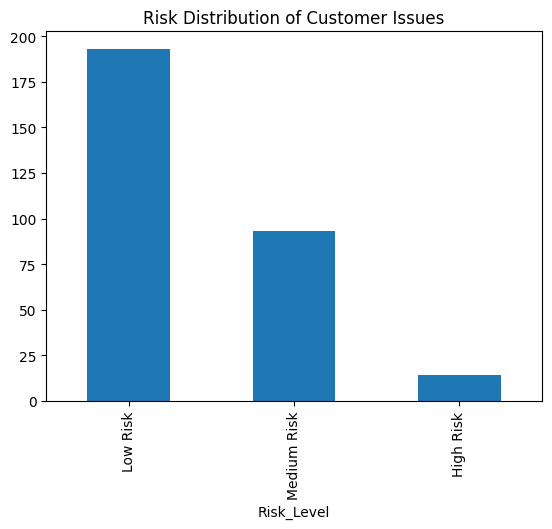

In [ ]:
df['Risk_Level'].value_counts().plot(kind='bar')
plt.title("Risk Distribution of Customer Issues")
plt.show()

In [ ]:
df.to_csv("final_ai_insights.csv", index=False)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['clean_text'])


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)


In [ ]:
print(df.groupby('Cluster')['Issue_Text'].head(3))


0                   Login issue
1                   Login issue
2     Transaction not reflected
3                Refund delayed
4     Transaction not reflected
5                Refund delayed
6              Card not working
7                Refund delayed
8              Card not working
9                Payment failed
10    Transaction not reflected
11                  Login issue
12               Payment failed
14               Payment failed
19              Account blocked
Name: Issue_Text, dtype: object


In [ ]:
summary_data = df.groupby('Cluster').agg({
    'Issue_Text':'count',
    'sentiment':'mean'
}).reset_index()

summary_data.columns = ['Cluster','Total_Issues','Avg_Sentiment']

print(summary_data)


   Cluster  Total_Issues  Avg_Sentiment
0        0            57            0.0
1        1            53           -0.5
2        2            53            0.0
3        3            49            0.0
4        4            88            0.0


In [ ]:
def generate_insight(row):
    if row['Avg_Sentiment'] < 0:
        tone = "negative customer sentiment"
    else:
        tone = "neutral or positive sentiment"

    return f"Cluster {row['Cluster']} has {row['Total_Issues']} issues showing {tone}, indicating potential process improvement opportunities."

summary_data['AI_Insight'] = summary_data.apply(generate_insight, axis=1)

print(summary_data[['Cluster','AI_Insight']])


   Cluster                                         AI_Insight
0        0  Cluster 0.0 has 57.0 issues showing neutral or...
1        1  Cluster 1.0 has 53.0 issues showing negative c...
2        2  Cluster 2.0 has 53.0 issues showing neutral or...
3        3  Cluster 3.0 has 49.0 issues showing neutral or...
4        4  Cluster 4.0 has 88.0 issues showing neutral or...


In [ ]:
high_risk = df[df['Risk_Level']=="High Risk"].shape[0]
total = df.shape[0]

executive_summary = f"""
AI Analysis Summary:
- Total issues analyzed: {total}
- High-risk issues detected: {high_risk}
- Major patterns were automatically identified using NLP clustering.
- Key recommendation: Focus on clusters showing negative sentiment trends.
"""

print(executive_summary)



AI Analysis Summary:
- Total issues analyzed: 300
- High-risk issues detected: 14
- Major patterns were automatically identified using NLP clustering.
- Key recommendation: Focus on clusters showing negative sentiment trends.



In [ ]:
#ai assistant

In [ ]:
!pip install transformers


In [ ]:
from transformers import pipeline

ai_assistant = pipeline("text-generation", model="gpt2")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/148 [00:00<?, ?it/s]

GPT2LMHeadModel LOAD REPORT from: gpt2
Key                  | Status     |  | 
---------------------+------------+--+-
h.{0...11}.attn.bias | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
context = summary_data.to_string()

def ask_ai(question):
    prompt = f"""
You are an AI Operations Analyst.

Here is the analysis data:
{context}

Question: {question}

Answer:
"""

    response = ai_assistant(
        prompt,
        max_length=200,
        num_return_sequences=1,
        temperature=0.7
    )

    return response[0]['generated_text']


In [ ]:
print(ask_ai("What is the biggest risk area?"))


Passing `generation_config` together with generation-related arguments=({'temperature', 'num_return_sequences', 'max_length'}) is deprecated and will be removed in future versions. Please pass either a `generation_config` object OR all generation parameters explicitly, but not both.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=200) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)



You are an AI Operations Analyst.

Here is the analysis data:
   Cluster  Total_Issues  Avg_Sentiment                                                                                                                  AI_Insight
0        0            57            0.0  Cluster 0.0 has 57.0 issues showing neutral or positive sentiment, indicating potential process improvement opportunities.
1        1            53           -0.5    Cluster 1.0 has 53.0 issues showing negative customer sentiment, indicating potential process improvement opportunities.
2        2            53            0.0  Cluster 2.0 has 53.0 issues showing neutral or positive sentiment, indicating potential process improvement opportunities.
3        3            49            0.0  Cluster 3.0 has 49.0 issues showing neutral or positive sentiment, indicating potential process improvement opportunities.
4        4            88            0.0  Cluster 4.0 has 88.0 issues showing neutral or positive sentiment, indicatin